# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Gabriel Ulhoa de Avelar Scodiero </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange
import numpy as np
from scipy import stats


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/gabiuas/Ciencia dos Dados/APS5


In [2]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [23]:
A=[]
for i in df.Latitude:
    if i >0:
        a="Norte"
        A.append(a)
        
    if i < 0:
        a="Sul"
        A.append(a)
        
df["Hemisferio"] = pd.Series(A)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [24]:
Mag=df['Magnitude']
faixa = arange(5.5,9.1,.1)
Mag.describe()
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Valor,Hemisferio
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte,Norte
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte,Norte
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul,Sul
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul,Sul
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte,Norte


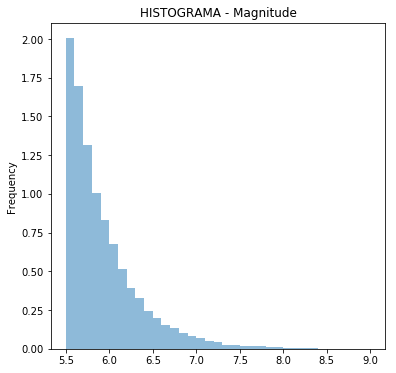

In [22]:
plot = Mag.plot.hist(bins=faixa,title='HISTOGRAMA - Magnitude',figsize=(6, 6), normed=1, alpha=0.5)

Vemos pelo histograma que grande parte dos terremotos tem magnitude entre 5.5 e 6. Também é possivel ver que não a terremotos com magnitude menor que 5.5 e maior que 9.1.     

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [79]:
expon.fit(Mag)

(5.4999999996710809, 0.38254864885090978)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

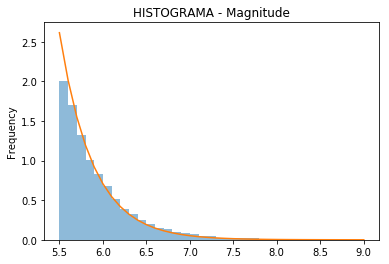

In [80]:
Mag.plot.hist(bins=faixa,title='HISTOGRAMA - Magnitude',figsize=(6, 4),normed=True, alpha=0.5)
plt.plot(faixa,expon.pdf(faixa, loc=5.4999999996710809, scale=0.38254864885090978))

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [81]:
ct=(pd.crosstab(df.Hemisferio,df.Type,margins=True,rownames=['Hemisferio'], colnames=['Type']))
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,10513,3,100,1,10617
Sul,12718,1,75,0,12794
All,23231,4,175,1,23411


In [83]:
#Normalizada
ct2=(pd.crosstab(df.Hemisferio,df.Type,margins=True,rownames=['Hemisferio'], colnames=['Type'], normalize='all')*100).round(decimals=10)  
ct2

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,44.906241,0.012814,0.427150,0.004271,45.350476
Sul,54.324890,0.004271,0.320362,0.000000,54.649524
All,99.231131,0.017086,0.747512,0.004271,100.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [85]:
N=44.906241
T=99.231131
P=N/(T)
print(P*100)

45.254186410512645


Explique o seu raciocínio

Peguei a probabilidade de ter um terremoto no norte e divide pela probabilidade total de ter um terremoto

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [86]:
N=45.350476
EN=0.427150
P=EN/(N)
print(P*100)

0.9418864754583832


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [87]:
print("A probabilidade de ter sido `Nuclear Explosion` é {}".format(P*100))

A probabilidade de ter sido `Nuclear Explosion` é 0.9418864754583832


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

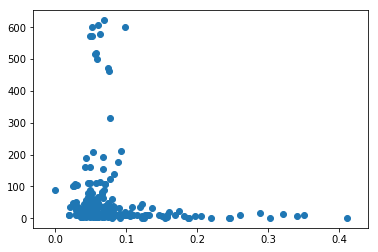

In [88]:
plt.scatter(df['Magnitude Error'], df['Depth'])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [89]:
co= df.Depth.corr(df["Magnitude Error"])
print(co)

-0.0769184389234


Explique o que significa o valor da correlação calculada acima? 

Vemos que o valor se aproxima de zero, e quanto mais próximo de zero menos correlação entre as duas, portanto, "Magnitude Error" e "Depth" tem pouca correlação      

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64


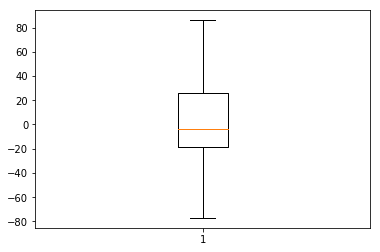

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64


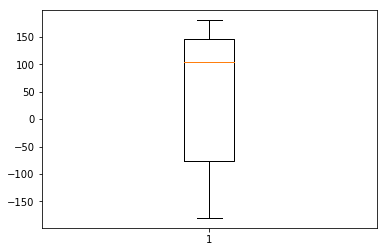

In [93]:
print(df.Latitude.describe())
plt.boxplot(df.Latitude)
plt.show()

print(df.Longitude.describe())
plt.boxplot(df.Longitude)
plt.show()

Ao analisar os boxplots, é possivel ver que a mediana da Latitude é muito menor que a da Longitude, com isso é possivel dier que há mais eventos no oriente do que no ocidente do planeta, porem com com valores mais espalhados e mais outliars.   

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [95]:
ct3=(pd.crosstab(df.Hemisferio,df["Magnitude Type"],margins=True,rownames=['Hemisferio'], colnames=['Magnitude Type'], normalize='all')*100).round(decimals=10)  
ct3

Magnitude Type,MB,MD,MH,ML,MS,MW,MWB,MWC,MWR,MWW,All
Hemisferio,,,,,,,,,,,
Norte,7.403452,0.012816,0.017088,0.200786,3.216849,15.678401,4.694976,10.432331,0.042720,3.644053,45.343472
Sul,8.659433,0.012816,0.004272,0.128161,4.054170,17.310321,5.805707,13.785885,0.068353,4.827409,54.656528
All,16.062884,0.025632,0.021360,0.328947,7.271018,32.988722,10.500684,24.218216,0.111073,8.471463,100.000000


In [96]:
ct4=(pd.crosstab(df.Hemisferio,df.Type,margins=True,rownames=['Hemisferio'], colnames=['Type'], normalize='all')*100).round(decimals=10)  
ct4

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,44.906241,0.012814,0.427150,0.004271,45.350476
Sul,54.324890,0.004271,0.320362,0.000000,54.649524
All,99.231131,0.017086,0.747512,0.004271,100.000000


In [107]:
ct6=(pd.crosstab(df.Hemisferio,[df["Magnitude Type"]=="MB",df["Type"]=="Nuclear Explosion"], normalize='all')*100).round(decimals=10)  
ct6

Magnitude Type      False               True           
Type                False     True      False     True 
Hemisferio                                             
Norte           37.905258  0.042715  7.018068  0.384435
Sul             45.982658  0.008543  8.346504  0.311819

In [109]:
PN=0.384435
PS=0.311819

if PN > PS:
    print("Probabilidade de acontecer no Norte é maior")
if PN < PS:
    print("Probabilidade de acontecer no Sul é maior")



Probabilidade de acontecer no Norte é maior
